In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2023-05-29 11:26:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   729KB/s    in 0.3s    

2023-05-29 11:26:01 (729 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [2]:
! unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


## EXPLORATION DATA ANALYSIS

### Loading datas

In [3]:
datas = open("SMSSpamCollection")

In [4]:
import csv
content_csv = csv.reader(datas,delimiter='\t')
for line in content_csv:
  print(line)
datas.close()

Streaming output truncated to the last 5000 lines.
['ham', 'Do you know where my lab goggles went']
['ham', 'Can you open the door?']
['ham', 'Waiting for your call.']
['ham', 'Nope i waiting in sch 4 daddy... ']
['spam', 'You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327']
['ham', "I'm tired of arguing with you about this week after week. Do what you want and from now on, i'll do the same."]
['ham', 'Ü wait 4 me in sch i finish ard 5..']
['spam', 'our mobile number has won £5000, to claim calls us back or ring the claims hot line on 09050005321.']
['ham', 'Arngd marriage is while u r walkin unfortuntly a snake bites u. bt love marriage is dancing in frnt of d snake &amp; sayin Bite me, bite me.']
['ham', 'Huh so early.. Then ü having dinner outside izzit?']
['ham', 'Ok anyway no need to change with what you said']
['spam', 'We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery to

### Create a dataframe

In [5]:
import pandas as pnd
datas = open("SMSSpamCollection")
extractDatas = []
content_csv = csv.reader(datas,delimiter='\t')
for line in content_csv:
  extractDatas.append([line[1],line[0]])

df = pnd.DataFrame(extractDatas,columns=["X","Y"])
datas.close()

In [6]:
df.head()

,X,Y
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


### Basic analysis

In [7]:
#Missing datas ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       5572 non-null   object
 1   Y       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df["Y"].value_counts()

ham     4825
spam     747
Name: Y, dtype: int64

### Text preprocessing

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
import re
def preprocessing(text):

  text = re.sub("[^a-zA-Z]", " ",str(text))

  #Tokenization
  tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

  #Remove stop words
  stop = stopwords.words('english')
  tokens = [token for token in tokens if token not in stop]

  #Remove word length less than 3 characters
  tokens = [word for word in tokens if len(word) >= 3]
  
  #To lower
  tokens = [word.lower() for word in tokens]
  
  #Lemmatization
  lmtzr = WordNetLemmatizer()
  tokens = [lmtzr.lemmatize(word) for word in tokens]
  
  #Sentence reconstitution
  preprocessed_text= ' '.join(tokens)
  return preprocessed_text

In [11]:
nltk.download('omw-1.4')
observation = df.iloc[0]
print("Sentence : ",observation["X"])
pp = preprocessing(observation["X"])
print("Preprocess : ",pp)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sentence :  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Preprocess :  jurong point crazy available bugis great world buffet cine got amore wat


In [12]:
#Apply preprocessing on the dataset
for index, row in df.iterrows():
    row["X"] = preprocessing(row["X"])

In [13]:
sentence = df.iloc[0]
print("Sentence : ",sentence["X"])

Sentence :  jurong point crazy available bugis great world buffet cine got amore wat


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       5572 non-null   object
 1   Y       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
#Saving to csv
df.to_csv("dataset.csv",index=False)

### Term analysis

In [16]:
df = pnd.read_csv("dataset.csv")

In [17]:
df.head()

,X,Y
0,jurong point crazy available bugis great world...,ham
1,lar joking wif oni,ham
2,free entry wkly comp win cup final tkts may te...,spam
3,dun say early hor already say,ham
4,nah think go usf life around though,ham


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       5537 non-null   object
 1   Y       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       5537 non-null   object
 1   Y       5537 non-null   object
dtypes: object(2)
memory usage: 129.8+ KB


In [20]:
spam = df[df["Y"]=="spam"]
ham = df[df["Y"]=="ham"]

In [21]:
spam.head()

,X,Y
2,free entry wkly comp win cup final tkts may te...,spam
5,freemsg hey darling week word back like fun st...,spam
8,winner valued network customer selected receiv...,spam
9,had mobile month entitled update latest colour...,spam
11,six chance win cash from pound txt csh send co...,spam


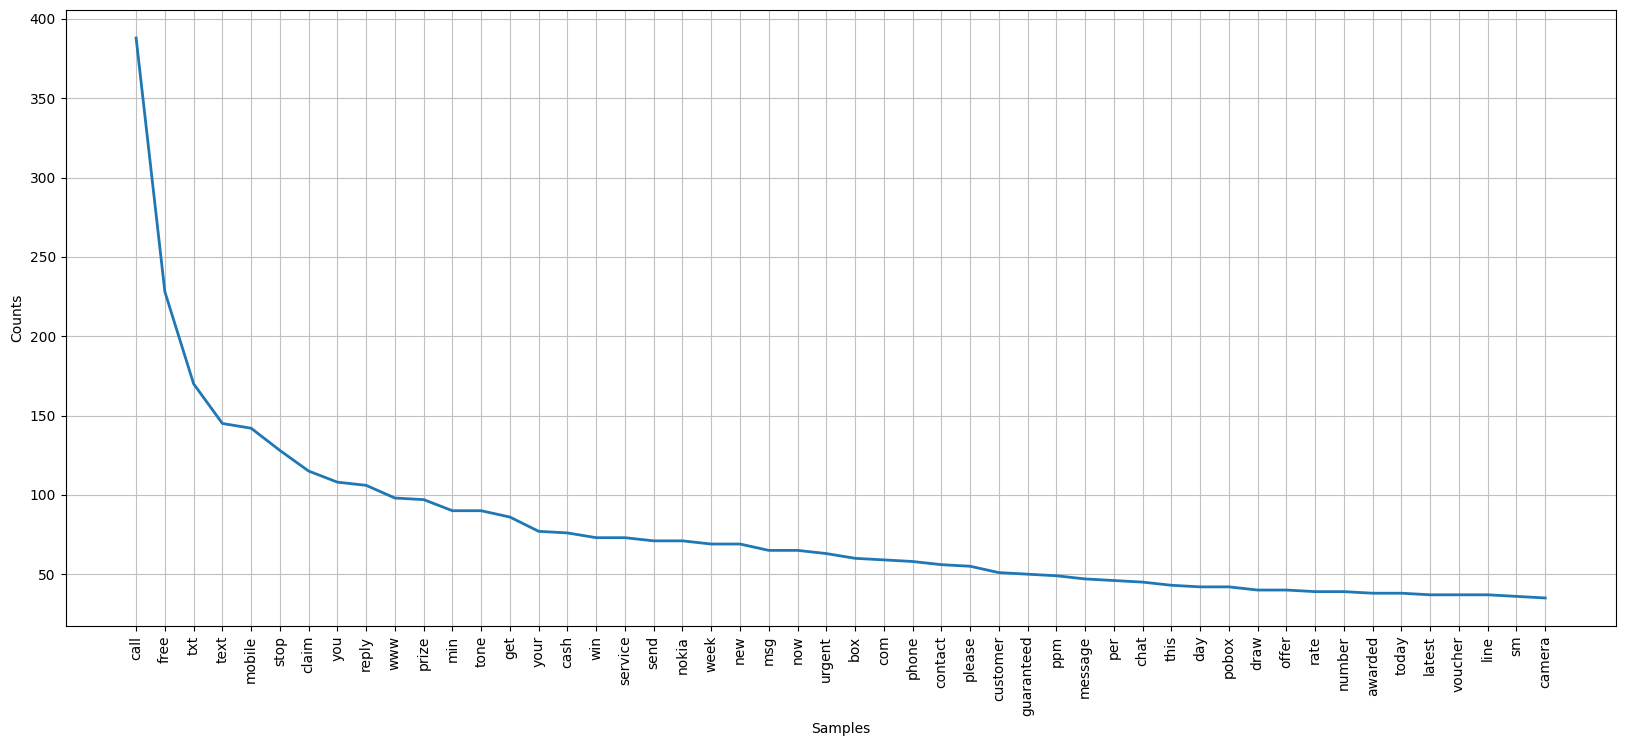

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
allTokensSpam = []
for index, row in spam.iterrows():
    tokens = [word for sent in nltk.sent_tokenize(row["X"]) for word in nltk.word_tokenize(sent)]
    
    for token in tokens :
      allTokensSpam.append(token)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
Freq_dist_nltk=nltk.FreqDist(allTokensSpam)
Freq_dist_nltk.plot(50, cumulative=False)

In [23]:
ham.head()

,X,Y
0,jurong point crazy available bugis great world...,ham
1,lar joking wif oni,ham
3,dun say early hor already say,ham
4,nah think go usf life around though,ham
6,even brother like speak they treat like aid pa...,ham


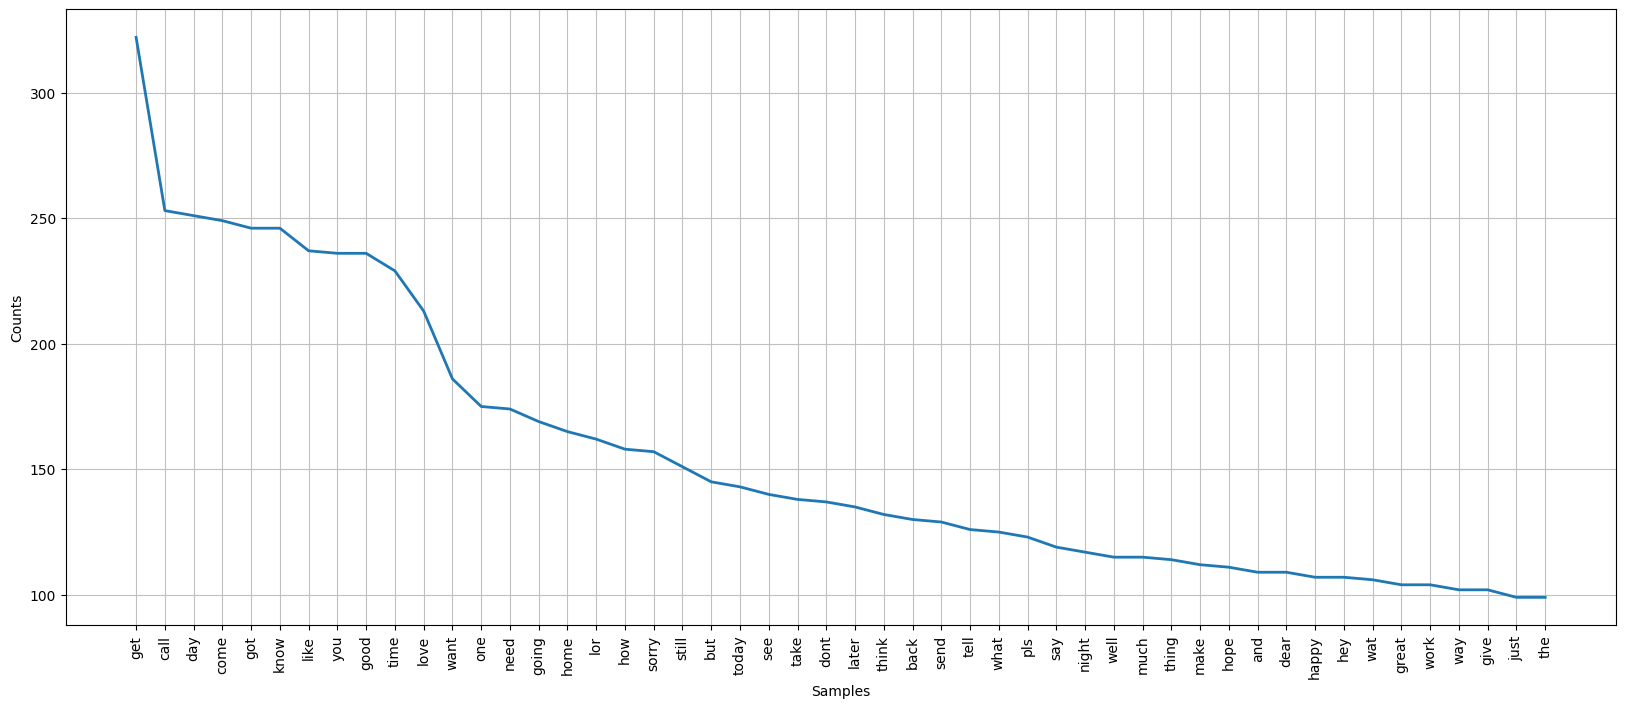

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
allTokensHam = []
import re
for index, row in ham.iterrows():
    tokens = [word for sent in nltk.sent_tokenize(row["X"]) for word in nltk.word_tokenize(sent)]
    
    for token in tokens :
      allTokensHam.append(token)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
Freq_dist_nltk=nltk.FreqDist(allTokensHam)
Freq_dist_nltk.plot(50, cumulative=False)

## MACHINE LEARNING

### Train / Test

In [25]:
df = pnd.read_csv("dataset.csv")
df = df.dropna()

In [26]:
df.head(10)

,X,Y
0,jurong point crazy available bugis great world...,ham
1,lar joking wif oni,ham
2,free entry wkly comp win cup final tkts may te...,spam
3,dun say early hor already say,ham
4,nah think go usf life around though,ham
5,freemsg hey darling week word back like fun st...,spam
6,even brother like speak they treat like aid pa...,ham
7,per request melle melle oru minnaminunginte nu...,ham
8,winner valued network customer selected receiv...,spam
9,had mobile month entitled update latest colour...,spam


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       5537 non-null   object
 1   Y       5537 non-null   object
dtypes: object(2)
memory usage: 129.8+ KB


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train,test= train_test_split(df, test_size=0.30, random_state=42)

In [30]:
train.head()

,X,Y
1116,let make saturday monday per convenience,ham
5470,thought slide enough,ham
5571,rofl it true name,ham
2184,chinatown got porridge claypot rice yam cake f...,ham
3937,they giving second chance rahul dengra,ham


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3875 entries, 1116 to 862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       3875 non-null   object
 1   Y       3875 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [32]:
train["Y"].value_counts()

ham     3351
spam     524
Name: Y, dtype: int64

### Vectorization : Bag of words

In [33]:
#Step 1 : get all SMS in an array
allSms = []
for index, row in train.iterrows():
  txt = re.sub("[^a-zA-Z]", " ",str(row["X"]))
  allSms.append(txt)

In [34]:
#Step 2 : vectorization BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
X_exp = vectorizer.fit_transform(allSms)

In [37]:
#Display all dimensions
print("NB DIM :", len(vectorizer.get_feature_names_out()))
for dim in vectorizer.get_feature_names_out():
  print(dim)

Streaming output truncated to the last 5000 lines.
chapter
character
charge
charged
charity
charles
charming
chart
chase
chasing
chastity
chat
chatlines
chatter
chatting
cheap
cheaper
cheat
cheating
check
checkboxes
checked
checkin
checking
checkmate
checkup
cheek
cheer
cheered
cheery
cheesy
cheetos
chef
chennai
cheque
cherish
cherthala
chess
chex
chez
chg
chgs
chic
chicken
chickened
chief
chik
chikku
child
childish
childporn
childrens
chill
chillin
china
chinatown
chinese
chinky
chinnu
chip
chit
chk
chocolate
choice
choose
choosing
chop
chore
chosen
christian
christmas
christmassy
chuck
church
ciao
cine
cinema
citizen
city
cktz
claim
claimcode
claire
clarification
clarify
clark
clas
clash
class
classic
classmate
claypot
cld
clean
cleaning
clear
cleared
clearer
clearing
clearly
clever
click
cliff
clock
clos
close
closeby
closed
closer
closingdate
clothes
cloud
clover
club
clubmoby
clubsaisai
clue
cme
cncl
cnl
cnn
co
coast
coaxing
coca
coccooning
cochin
cock
code
coffee
coherently
coimb

In [38]:
#Display vectorization
print(X_exp.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
#Create a dataframe
dfBOW = pnd.DataFrame(X_exp.toarray(),columns=vectorizer.get_feature_names_out())


In [40]:
#Example of vectorization (Baf Of Word)
print(train.iloc[0])
vector = dfBOW.iloc[0]
for i, v in vector.items():
    if v > 0:
      print('index: ', i, 'value: ', v,' <<<')

X    let make saturday monday per convenience
Y                                         ham
Name: 1116, dtype: object
index:  convenience value:  1  <<<
index:  let value:  1  <<<
index:  make value:  1  <<<
index:  monday value:  1  <<<
index:  per value:  1  <<<
index:  saturday value:  1  <<<


### Vectorization : TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', strip_accents='unicode', norm='l2')

In [43]:
#Determine all dimensions
X_train = vectorizer.fit_transform(train["X"])

In [45]:
dfTFIDF = pnd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names_out())

In [46]:
#Example of vectorization (TF-IDF)
print(train.iloc[0])
vector = dfTFIDF.iloc[0]
for i, v in vector.items():
    if v > 0:
      print('index: ', i, 'value: ', v,' <<<')

X    let make saturday monday per convenience
Y                                         ham
Name: 1116, dtype: object
index:  let value:  0.4235049281356626  <<<
index:  make value:  0.40069712908127836  <<<
index:  monday value:  0.5942241715081111  <<<
index:  saturday value:  0.5540604845920052  <<<


In [47]:
X_test = vectorizer.transform(test['X'])

In [48]:
#Verify that vector have the same size

print("X_train Nb rows : ",X_train.get_shape()[0])
print("X_train Nb dim : ",X_train.get_shape()[1])

print("X_test Nb rows : ",X_test.get_shape()[0])
print("X_test Nb dim : ",X_test.get_shape()[1])

X_train Nb rows :  3875
X_train Nb dim :  5158
X_test Nb rows :  1662
X_test Nb dim :  5158


### Learning

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
clf = MultinomialNB().fit(X_train, train["Y"])

In [51]:
y_nb_predicted = clf.predict(X_test)

In [52]:
print (y_nb_predicted)

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']


In [53]:
dfResult = pnd.DataFrame()
dfResult["Sentence"] = test["X"]
dfResult["Y"] = test["Y"]
dfResult["Yhat"] = y_nb_predicted

In [54]:
dfResult.head()

,Sentence,Y,Yhat
4513,now project after come,ham,ham
1238,paper morn aft tmr,ham,ham
2196,aluable ffectionate oveable ternal oble ruthfu...,ham,ham
230,dear good morning,ham,ham
4864,bored housewife chat date national rate min la...,spam,spam


### Evaluate

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test["Y"], y_nb_predicted)
print(cm)

[[1440    0]
 [  56  166]]


In [56]:
from sklearn.metrics import classification_report
print (classification_report(test["Y"], y_nb_predicted))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1440
        spam       1.00      0.75      0.86       222

    accuracy                           0.97      1662
   macro avg       0.98      0.87      0.92      1662
weighted avg       0.97      0.97      0.96      1662



In [66]:
feature_names = vectorizer.get_feature_names_out()
coefs = clf.feature_log_prob_
intercept = clf.feature_log_prob_
coefs_with_fns = sorted(zip(clf.feature_log_prob_[0], feature_names))
n = 10
top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])

for (coef_1, fn_1), (coef_2, fn_2) in top:
  print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1, fn_1, coef_2,fn_2))

	-9.4563	abta           		-5.6234	come           
	-9.4563	abta complimentary		-5.6488	time           
	-9.4563	access number  		-5.6563	know           
	-9.4563	accident claim 		-5.6867	like           
	-9.4563	account statement		-5.7382	got            
	-9.4563	aco            		-5.7483	lor            
	-9.4563	aco entry      		-5.7681	home           
	-9.4563	action         		-5.7792	good           
	-9.4563	active         		-5.8322	going          
	-9.4563	active play    		-5.8743	sorry          


### Test on a new sentence

In [67]:
sentence = "send a free txt with your mobile"

sentence = "send  free mobile"

In [68]:
pp = preprocessing(sentence)
print(pp)

send free mobile


In [69]:
sentence =  [sentence]
vector = vectorizer.transform(sentence)
vector

<1x5158 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [70]:
#Verify that vector have the same size

print("X_train Nb rows : ",X_train.get_shape()[0])
print("X_train Nb dim : ",X_train.get_shape()[1])

print("vector Nb rows : ",vector.get_shape()[0])
print("vector Nb dim : ",vector.get_shape()[1])

X_train Nb rows :  3875
X_train Nb dim :  5158
vector Nb rows :  1
vector Nb dim :  5158


In [71]:
clf.predict(vector)

array(['spam'], dtype='<U4')